In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/NFLX.csv'
netflix = pd.read_csv(file_path)
print(netflix.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2019-07-29  335.980011  336.399994  328.769989  332.700012  332.700012   
1  2019-07-30  329.200012  329.649994  323.230011  325.929993  325.929993   
2  2019-07-31  325.160004  331.769989  318.529999  322.989990  322.989990   
3  2019-08-01  324.250000  328.579987  318.739990  319.500000  319.500000   
4  2019-08-02  317.489990  319.410004  311.799988  318.829987  318.829987   

    Volume  
0  5782800  
1  6029300  
2  6259500  
3  6563200  
4  6280300  


In [3]:
import plotly.express as px
import pandas as pd

# Create a histogram
for i in ["Open","High", "Low", "Close"]:
  fig = px.line(netflix, x='Date', y=i, title=f"Line chart: {i} rate Vs Date")
  fig.show()


Differencing is a technique used to transform a non-stationary time series into a stationary one. The logic behind differencing for stationarity check involves addressing the following key aspects:

What is Stationarity?
A time series is considered stationary if its statistical properties such as mean, variance, and autocorrelation are constant over time. Stationarity is a crucial assumption for many time series analysis techniques and models, such as ARIMA (AutoRegressive Integrated Moving Average), because these models assume that the underlying time series is stationary.

Non-Stationarity in Time Series
A non-stationary time series has properties that change over time. This can manifest as trends (long-term increase or decrease), seasonality (repeating patterns), or other systematic changes. Non-stationarity can lead to unreliable statistical inferences and model predictions.

Logic Behind Differencing
Differencing is used to remove trends and stabilize the mean of a time series by transforming it into one that is stationary. The process involves subtracting the current value of the series from the previous value. Here's the logic:

Trend Removal: Many time series exhibit trends over time. By differencing, we remove these trends, as the difference between successive observations is more likely to be stationary even if the original series is not.

Stabilizing the Mean: Differencing helps in stabilizing the mean of the time series by removing changes in the level of a series, thus making the mean constant over time.

Simplifying the Model: Stationary series are easier to model and forecast since their statistical properties are constant over time.

# Stationarity Check using augmented Dicky Fuller Test (Unit root test)

# The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary or has a unit root, implying it is non-stationary. The hypothesis for the ADF test is as follows:

## Null Hypothesis
### The time series has a unit root, which means it is non-stationary. In other words, there is some systematic pattern in the time series, such as a trend or random walk.

## Alternative Hypothesis
### The time series does not have a unit root, implying it is stationary. This means that the time series does not have a systematic pattern, and its properties do not depend on the time at which it is observed.

In [4]:
timeseries = netflix[['Date', 'Open']]

In [5]:
timeseries.set_index('Date', inplace= True)

In [6]:
import pandas as pd
import statsmodels.tsa.stattools as ts

# Perform the Augmented Dickey-Fuller test on the 'Open' column
adf_result = ts.adfuller(timeseries['Open'])

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.0829035607702997
p-value: 0.72184139234496
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


# We will now do second level differencing and will again do Augmented Dicky Fuller test to check for stationarity.

In [7]:
import pandas as pd
import statsmodels.tsa.stattools as ts

# Perform first differencing
timeseries_diff1 = timeseries.diff().dropna()

# Perform second differencing
timeseries_diff2 = timeseries_diff1.diff().dropna()

# Perform the Augmented Dickey-Fuller test on the second differenced series
adf_result = ts.adfuller(timeseries_diff2['Open'])

# Print the test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -12.611948891604987
p-value: 1.647939693194755e-23
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [8]:
timeseries.head()

,Open
Date,
2019-07-29,335.980011
2019-07-30,329.200012
2019-07-31,325.160004
2019-08-01,324.250000
2019-08-02,317.489990


In [9]:
timeseries_diff2.head()

,Open
Date,
2019-07-31,2.739991
2019-08-01,3.130004
2019-08-02,-5.850006
2019-08-05,0.230011
2019-08-06,6.149995


## p value is now < 0.05, hence Null Hypothesis is rejected, which implies that data is now stationary.

# Decomposition

## Method of selected points

In [10]:
ts2 = timeseries.copy()

In [11]:
# Calculate the 15-day moving average for the 'Open' column
ts2['15_day_MA'] = ts2['Open'].rolling(window=15).mean()

# Print the resulting DataFrame
print(ts2.head(25))

                  Open   15_day_MA
Date                              
2019-07-29  335.980011         NaN
2019-07-30  329.200012         NaN
2019-07-31  325.160004         NaN
2019-08-01  324.250000         NaN
2019-08-02  317.489990         NaN
2019-08-05  310.959991         NaN
2019-08-06  310.579987         NaN
2019-08-07  302.559998         NaN
2019-08-08  311.029999         NaN
2019-08-09  313.739990         NaN
2019-08-12  305.459991         NaN
2019-08-13  309.769989         NaN
2019-08-14  308.010010         NaN
2019-08-15  299.500000         NaN
2019-08-16  298.859985  313.503330
2019-08-19  306.250000  311.521330
2019-08-20  304.570007  309.879329
2019-08-21  301.609985  308.309328
2019-08-22  298.649994  306.602661
2019-08-23  295.000000  305.103328
2019-08-26  295.239990  304.055328
2019-08-27  294.540009  302.985996
2019-08-28  289.470001  302.113330
2019-08-29  295.000000  301.044663
2019-08-30  298.779999  300.047331


In [12]:
ts2 = ts2[ts2['15_day_MA'].notnull()]

In [13]:
ts2.head()

,Open,15_day_MA
Date,,
2019-08-16,298.859985,313.503330
2019-08-19,306.250000,311.521330
2019-08-20,304.570007,309.879329
2019-08-21,301.609985,308.309328
2019-08-22,298.649994,306.602661


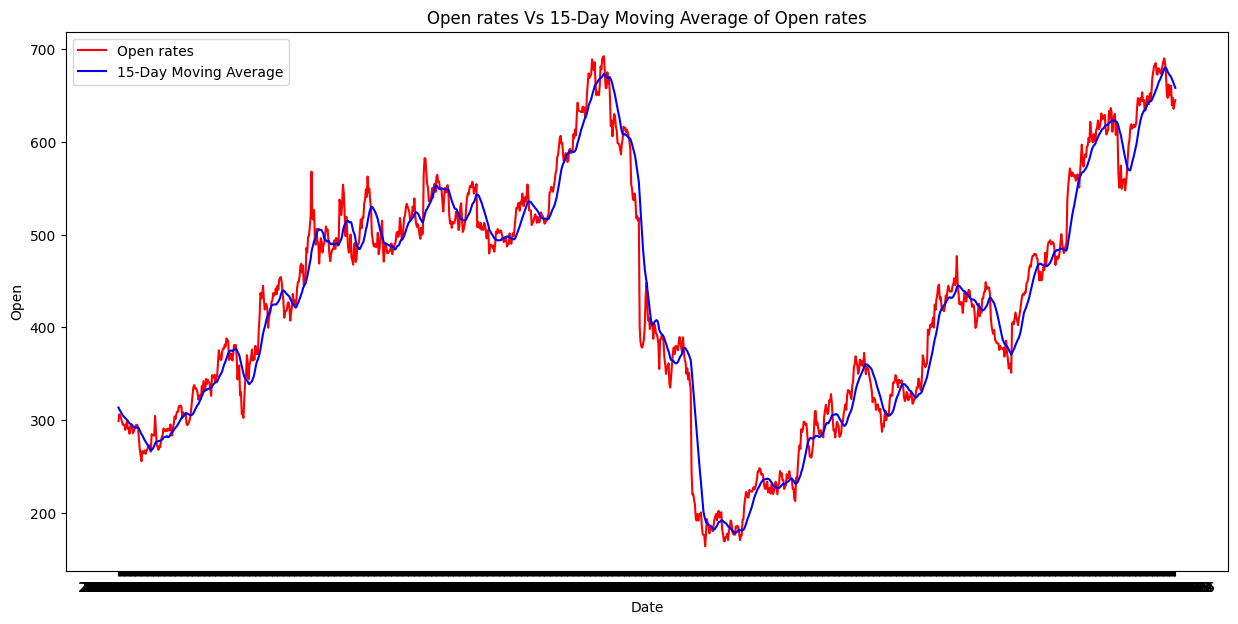

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.lineplot(x=ts2.index, y=ts2['Open'], label="Open rates", color='red')
sns.lineplot(x=ts2.index, y=ts2['15_day_MA'], label='15-Day Moving Average', color='blue')

plt.title('Open rates Vs 15-Day Moving Average of Open rates')
plt.legend()

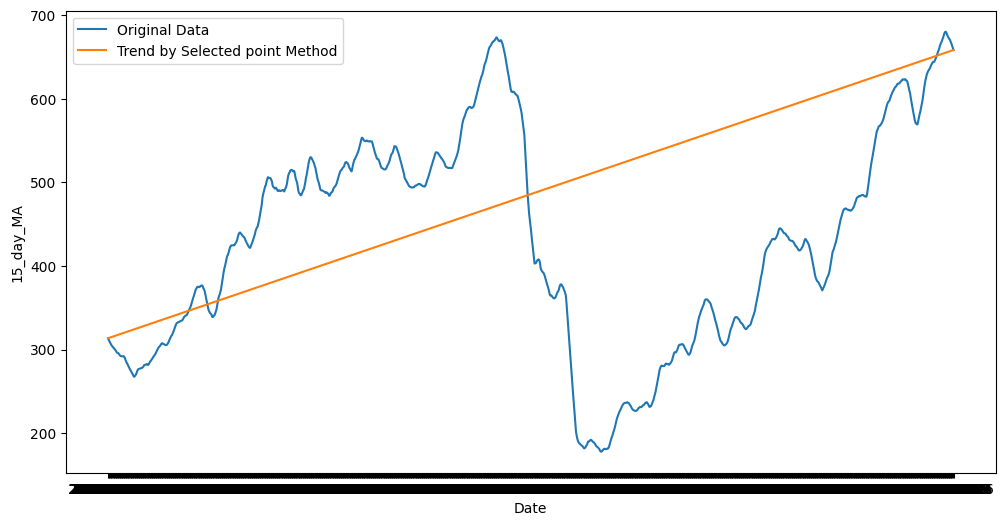

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ts2 is your time series DataFrame with a '15_day_MA' column
first_point = ts2['15_day_MA'].iloc[0]
last_point = ts2['15_day_MA'].iloc[-1]

first_date = ts2.index[0]
last_date = ts2.index[-1]

# Create a DataFrame to hold the trend points
trend_points = pd.DataFrame({
    'Date': [first_date, last_date],
    'Trend': [first_point, last_point]
}).set_index('Date')

# Plot the original data and the trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=ts2['15_day_MA'], label='Original Data')
sns.lineplot(x=trend_points.index, y=trend_points['Trend'], label='Trend by Selected point Method')
plt.legend()
plt.show()


# Using Semi Avg Method

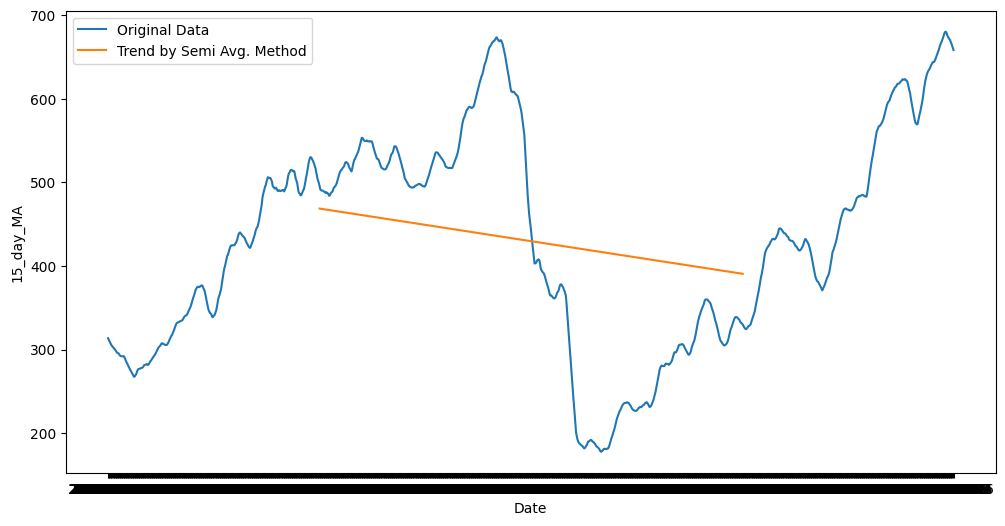

In [16]:
first_half = ts2.iloc[:int(len(ts2)/2), 1]
second_half = ts2.iloc[int(len(ts2)/2):, 1]

first_point_avg = first_half.mean()
second_point_avg = second_half.mean()

# Create a DataFrame to hold the trend points
trend_points = pd.DataFrame({
    'Date': [first_half.index[int(len(first_half)/2)], second_half.index[int(len(second_half)/2)]],
    'Trend': [first_point_avg, second_point_avg]
}).set_index('Date')

# Plot the original data and the trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=ts2['15_day_MA'], label='Original Data')
sns.lineplot(x=trend_points.index, y=trend_points['Trend'], label='Trend by Semi Avg. Method')
plt.legend()
plt.show()


In [17]:
# Calculate the 15-day moving average for the 'Open' column
ts2['1_year_MA'] = ts2['Open'].rolling(window=365).mean()

# Print the resulting DataFrame
print(ts2.head(366))

                  Open   15_day_MA   1_year_MA
Date                                          
2019-08-16  298.859985  313.503330         NaN
2019-08-19  306.250000  311.521330         NaN
2019-08-20  304.570007  309.879329         NaN
2019-08-21  301.609985  308.309328         NaN
2019-08-22  298.649994  306.602661         NaN
...                ...         ...         ...
2021-01-22  582.099976  523.953333         NaN
2021-01-25  567.000000  526.717997         NaN
2021-01-26  554.729980  527.766663         NaN
2021-01-27  550.710022  529.710665  410.219068
2021-01-28  535.880005  531.304665  410.868438

[366 rows x 3 columns]


In [18]:
ts3 = ts2[ts2['1_year_MA'].notnull()]

In [19]:
ts3.head()

,Open,15_day_MA,1_year_MA
Date,,,
2021-01-27,550.710022,529.710665,410.219068
2021-01-28,535.880005,531.304665,410.868438
2021-01-29,538.000000,533.285999,411.503369
2021-02-01,536.789978,534.984664,412.139589
2021-02-02,542.010010,537.262665,412.798219


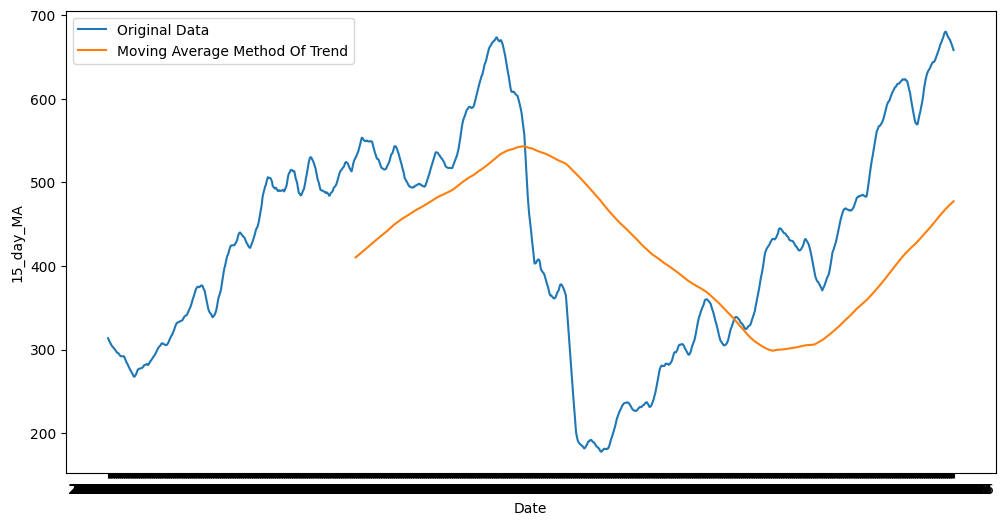

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ts2['15_day_MA'], label='Original Data')
sns.lineplot(data=ts3['1_year_MA'], label='Moving Average Method Of Trend')
plt.legend()
plt.show()

# Checking Seasonality

In [21]:
ts4 = ts2.copy()

In [22]:
ts4['1_month_MA'] = ts4['Open'].rolling(window=30).mean()
ts4['1_qtr_MA'] = ts4['Open'].rolling(window=90).mean()

In [23]:
ts4['seasonal_15D'] = ts4['Open']/ ts4['15_day_MA']
ts4['seasonal_1M'] = ts4['Open']/ ts4['1_month_MA']
ts4['seasonal_1QTR'] = ts4['Open']/ ts4['1_qtr_MA']

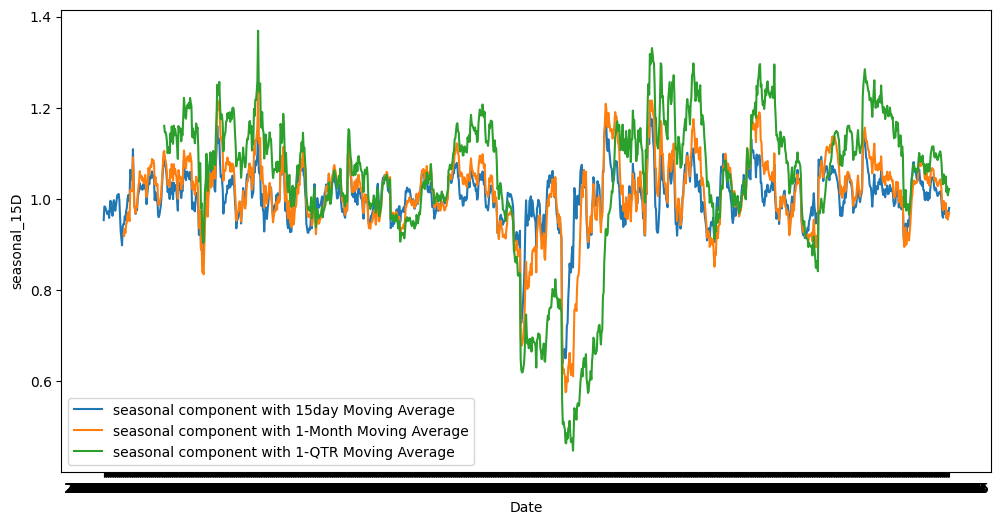

In [24]:
plt.figure(figsize=(12, 6))

sns.lineplot(data= ts4['seasonal_15D'], label = "seasonal component with 15day Moving Average")
sns.lineplot(data= ts4['seasonal_1M'], label = "seasonal component with 1-Month Moving Average")
sns.lineplot(data= ts4['seasonal_1QTR'], label = "seasonal component with 1-QTR Moving Average")

plt.legend()
plt.show()

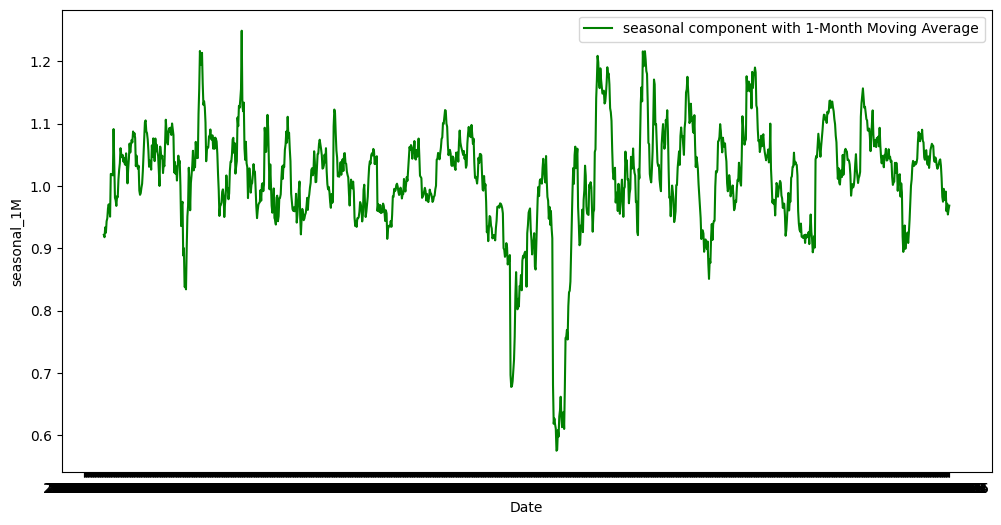

In [25]:
plt.figure(figsize=(12, 6))

sns.lineplot(data= ts4['seasonal_1M'], label = "seasonal component with 1-Month Moving Average", color = "green")

plt.legend()
plt.show()

In [26]:
ts2.columns

Index(['Open', '15_day_MA', '1_year_MA'], dtype='object')

# We will use stationary data to run the models.

In [27]:
timeseries_diff2.head()

,Open
Date,
2019-07-31,2.739991
2019-08-01,3.130004
2019-08-02,-5.850006
2019-08-05,0.230011
2019-08-06,6.149995


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt


In [29]:
train_size = int(len(timeseries_diff2) * 0.8)
train, test = timeseries_diff2[:train_size], timeseries_diff2[train_size:]


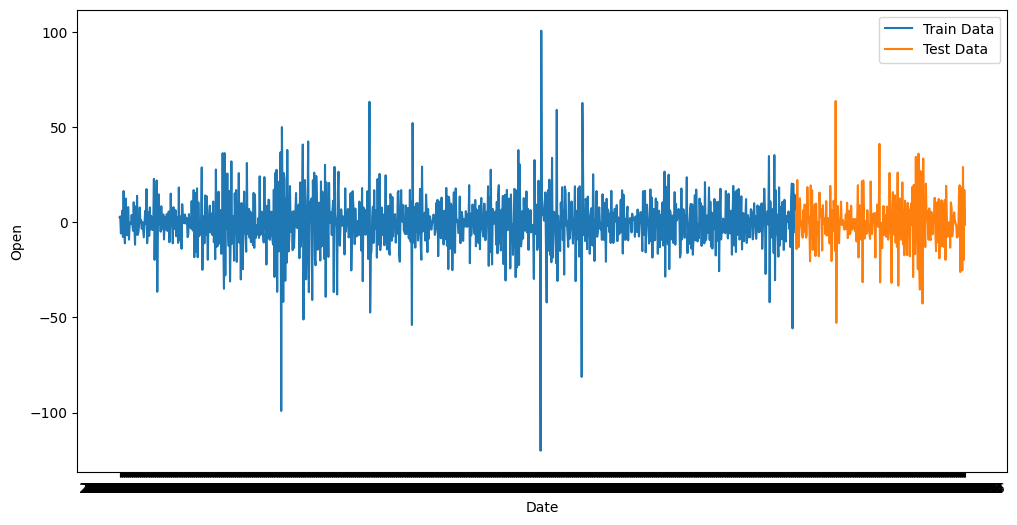

In [30]:
plt.figure(figsize=(12, 6))

sns.lineplot(data= train['Open'], label = "Train Data")
sns.lineplot(data= test['Open'], label = "Test Data")

plt.legend()
plt.show()

# Applying Holt-Winters Forecasting

In [31]:
model = ExponentialSmoothing(train['Open'], trend='add', seasonal='add', seasonal_periods=365).fit()
hw_forecast = model.forecast(len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



## Calculating RMSE

In [32]:
rmse = sqrt(mean_squared_error(test['Open'], hw_forecast))
print(f'RMSE: {rmse}')


RMSE: 17.201510984874712


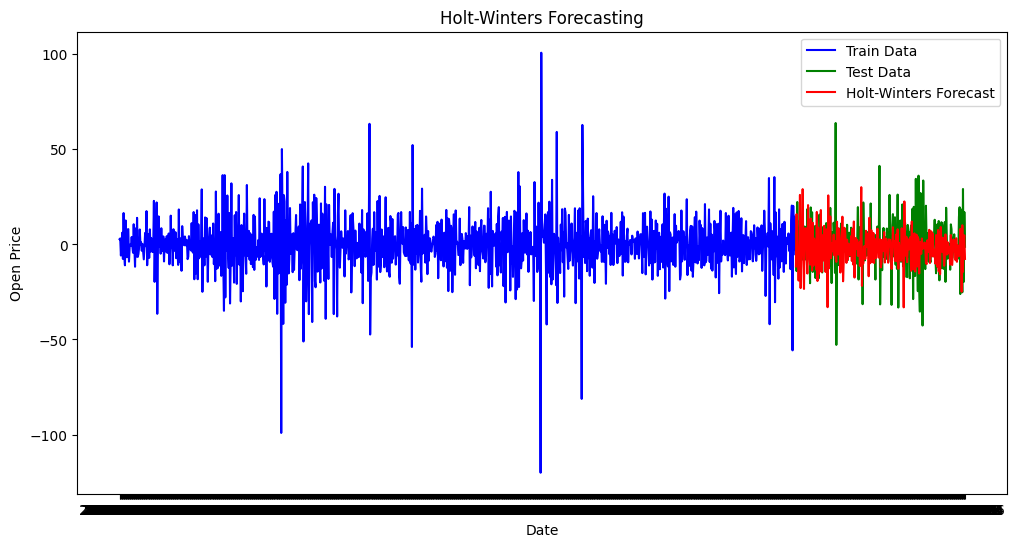

In [33]:
plt.figure(figsize=(12, 6))

#plt.plot(ts2['Open'], label='Original Data', color='blue')
plt.plot(train['Open'], label='Train Data', color='blue')
plt.plot(test['Open'], label='Test Data', color='green')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', color='red')

plt.legend()
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()


In [34]:
!pip install pmdarima
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00


### The choice to set seasonal=False in the auto_arima function depends on whether the data exhibits seasonal patterns. In the context of stock prices, seasonality might not be as prominent as in other time series data like monthly sales or temperature data, where patterns repeat at regular intervals (e.g., yearly, quarterly).

In [35]:
# Fit the model
arima_model = auto_arima(train['Open'], seasonal=False, stepwise=True, trace=True)

# Print the selected values of p, d, q
print(f"Selected ARIMA order: {arima_model.order}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=6.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8317.220, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8054.570, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7947.618, Time=0.50 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=7872.004, Time=0.58 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=7844.120, Time=0.77 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=7824.165, Time=1.42 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=5.08 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=7.31 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=7826.165, Time=2.03 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 24.914 seconds
Selected ARIMA order: (5, 0, 0)


In [36]:
# Fit the model
arima_model = auto_arima(timeseries['Open'], seasonal=False, stepwise=True, trace=True)

# Print the selected values of p, d, q
print(f"Selected ARIMA order: {arima_model.order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9548.751, Time=3.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9543.266, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9543.719, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9543.722, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9541.923, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9545.719, Time=1.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.852 seconds
Selected ARIMA order: (0, 1, 0)


# correlogram (autocorrelation plot)

In [37]:
pip install statsmodels


<Figure size 1200x600 with 0 Axes>

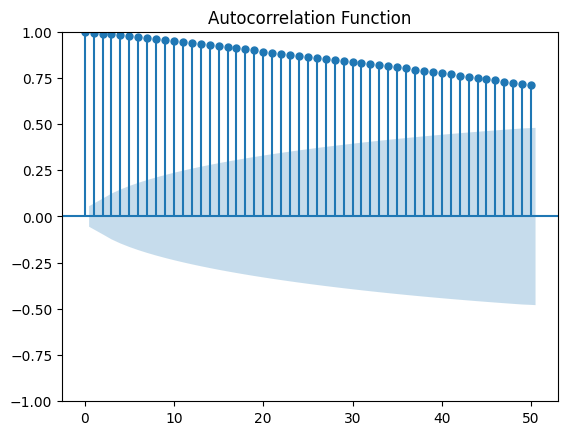

<Figure size 1200x600 with 0 Axes>

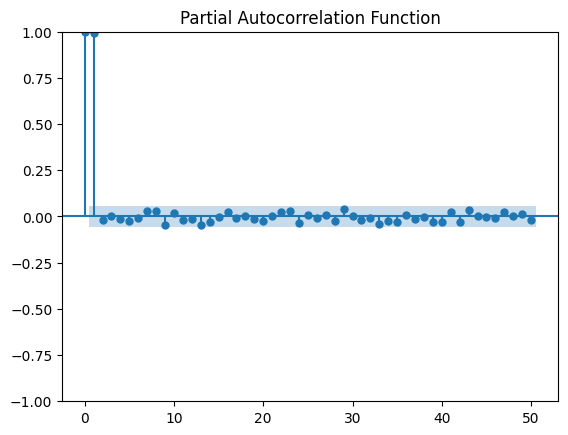

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_series = ts2['Open']

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data_series, lags=50, title='Autocorrelation Function', alpha=0.05)
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data_series, lags=50, title='Partial Autocorrelation Function', alpha=0.05)
plt.show()


<Figure size 1200x600 with 0 Axes>

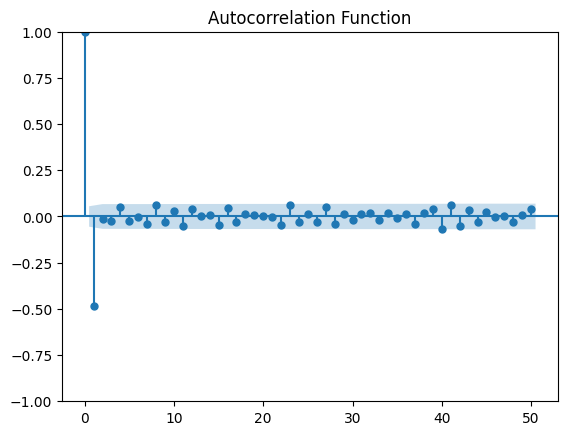

<Figure size 1200x600 with 0 Axes>

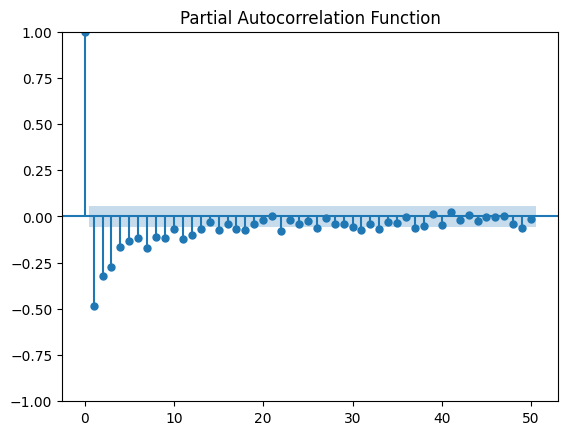

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_series = timeseries_diff2['Open']

# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data_series, lags=50, title='Autocorrelation Function', alpha=0.05)
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data_series, lags=50, title='Partial Autocorrelation Function', alpha=0.05)
plt.show()


# Which model to use:
## Use AR model if PACF plot shows sharp cut-off and ACF plot decays slowly and gradually.
## Use MA model if ACF plot shows sharp cut-off and PACF plot decays slowly and gradually.
## Use ARIMA otherwise

In [40]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg

In [41]:
timeseries_diff2.isna().sum()

,0
Open,0


In [42]:
timeseries.isna().sum()

,0
Open,0


In [43]:
train_size = int(len(timeseries_diff2) * 0.8)
train, test = timeseries_diff2.iloc[:train_size], timeseries_diff2.iloc[train_size:]

In [44]:
train.isna().sum()

,0
Open,0


In [45]:
test.isna().sum()

,0
Open,0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.





----------------------
----------------------
RMSE: 13.862970985942411
----------------------
----------------------


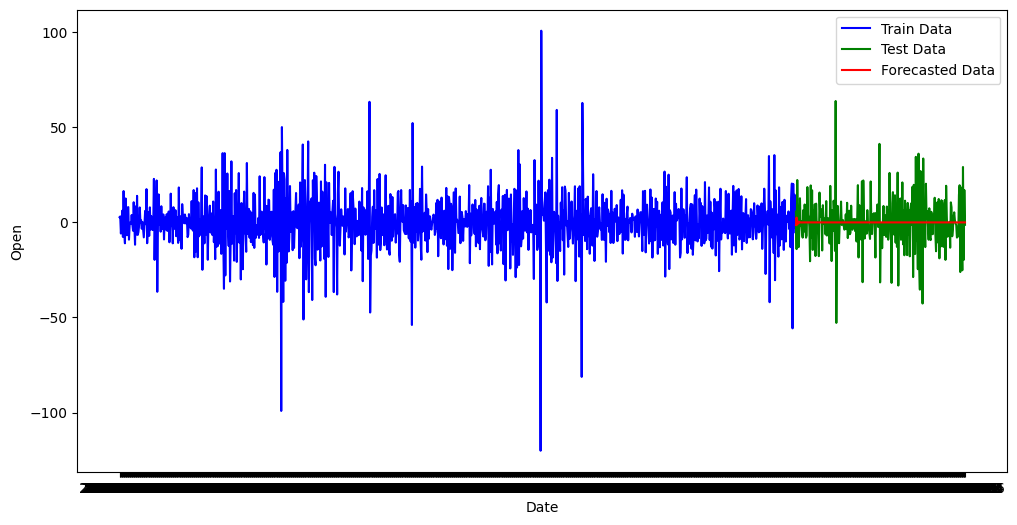

In [46]:
model = AutoReg(train['Open'], lags=2)
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Open'], forecast))
print("\n")
print("----------------------")
print("----------------------")
print(f'RMSE: {rmse}')
print("----------------------")
print("----------------------")

# Create a DataFrame for the forecast to align with test index
#forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=train['Open'], label='Train Data', color="blue")
sns.lineplot(data=test['Open'], label='Test Data', color="green")
sns.lineplot(data=forecast, label='Forecasted Data', color='red')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.





----------------------
----------------------
RMSE: 13.809470299072096
----------------------
----------------------


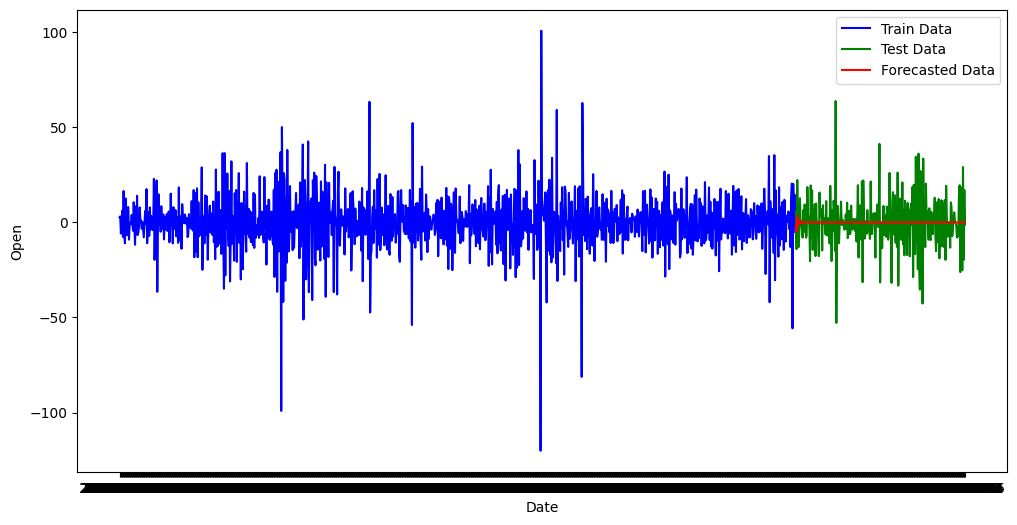

In [47]:
model = AutoReg(train['Open'], lags=5)
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Open'], forecast))
print("\n")
print("----------------------")
print("----------------------")
print(f'RMSE: {rmse}')
print("----------------------")
print("----------------------")

# Create a DataFrame for the forecast to align with test index
#forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=train['Open'], label='Train Data', color="blue")
sns.lineplot(data=test['Open'], label='Test Data', color="green")
sns.lineplot(data=forecast, label='Forecasted Data', color='red')
plt.legend()
plt.show()


In [72]:
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# train_size = int(len(timeseries_diff2) * 0.8)
# train, test = timeseries_diff2.iloc[:train_size], timeseries_diff2.iloc[train_size:]

# # Fit ARMA(1, 1) model
# model = ARIMA(train['Open'], order=(14, 1, 14))  # p=1, d=0 (no differencing), q=1
# model_fit = model.fit()

# # Forecast
# forecast = model_fit.predict(steps=len(test), typ='levels')  # Get forecast for the test period
# forecast_index = test.index  # Get the index from the test data


# # Create a DataFrame for the forecast to align with test index
# forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])
# #forecast_df.fillna(value=forecast.mean(), inplace=True)


# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test['Open'], forecast_df['Forecast']))
# print("\n")
# print("----------------------")
# print("----------------------")
# print(f'RMSE: {rmse}')
# print("----------------------")
# print("----------------------")

# # Plotting
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=train['Open'], label='Train Data', color="blue")
# sns.lineplot(data=test['Open'], label='Test Data', color="green")
# sns.lineplot(data=forecast_df['Forecast'], label='Forecasted Data', color='red')
# plt.legend()
# plt.show()


In [49]:
# Fit the model again and catch any exceptions
try:
    model = ARIMA(train['Open'], order=(1, 0, 1))  # p=1, d=0, q=1
    model_fit = model.fit()
    print(model_fit.summary())  # Print model summary for diagnostics
except Exception as e:
    print(f"Model fitting error: {e}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1004
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3831.362
Date:                Sat, 10 Aug 2024   AIC                           7670.724
Time:                        18:44:35   BIC                           7690.371
Sample:                             0   HQIC                          7678.189
                               - 1004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.002     -0.188      0.851      -0.004       0.003
ar.L1          0.0379      0.026      1.463      0.144      -0.013       0.089
ma.L1         -0.9999      0.139     -7.183      0.0

In [50]:
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Ensure the index is properly set in timeseries_diff2
# # timeseries_diff2.set_index('Date', inplace=True)  # Uncomment if needed

# # Train-test split
# train_size = int(len(timeseries_diff2) * 0.8)
# train, test = timeseries_diff2.iloc[:train_size], timeseries_diff2.iloc[train_size:]

# # Fit ARMA(1, 1) model
# model = ARIMA(train['Open'], order=(20, 0, 20))  # p=1, d=0 (no differencing), q=1
# model_fit = model.fit()

# # Forecast using predict
# forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# # Create a DataFrame for the forecast to align with test index
# forecast_index = test.index  # Get the index from the test data
# forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(test['Open'], forecast_df['Forecast']))
# print("\n")
# print("----------------------")
# print("----------------------")
# print(f'RMSE: {rmse}')
# print("----------------------")
# print("----------------------")

# # Plotting
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=train['Open'], label='Train Data', color="blue")
# sns.lineplot(data=test['Open'], label='Test Data', color="green")
# sns.lineplot(data=forecast_df['Forecast'], label='Forecasted Data', color='red')
# plt.legend()
# plt.show()


# Using CNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0135
Epoch 2/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0011
Epoch 3/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0011
Epoch 4/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0011
Epoch 5/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 8.3752e-04
Epoch 6/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8.4992e-04
Epoch 7/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011
Epoch 8/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0011
Epoch 9/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.7756e-04
Epoch 10/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.9558e-04
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


----------------------
----------------------
Train RMSE: 17.032317720928322
Test RMSE: 15.138815999794238
----------------------
----------------------


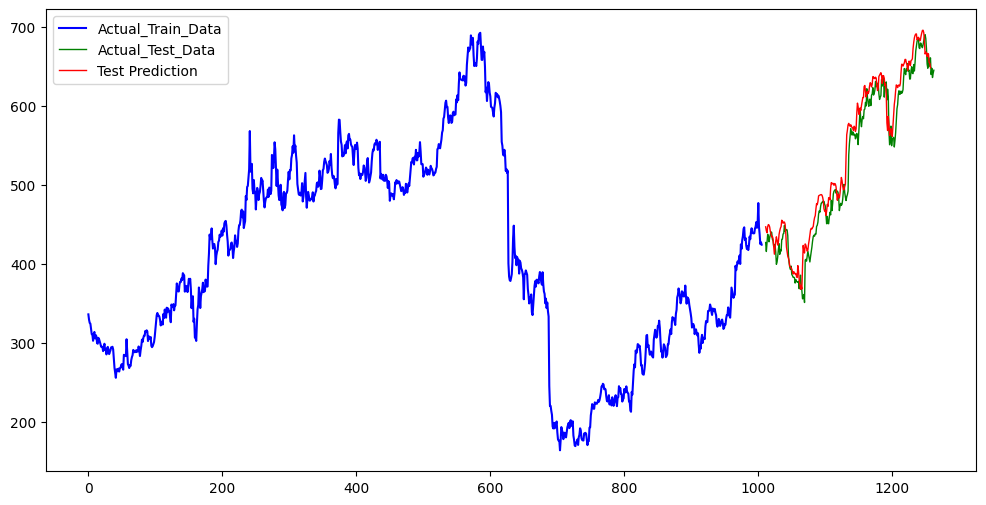

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Ensure the index is properly set in timeseries
# timeseries.set_index('Date', inplace=True)  # Uncomment if needed

# Select the 'Open' column and convert it to a numpy array
data = np.array(timeseries['Open']).reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Train-test split
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for CNN input
def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 5
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
print("\n")
print("----------------------")
print("----------------------")
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print("----------------------")
print("----------------------")

# Append NaN values at the beginning of test_data for alignment
nan_array = np.full((len(train_predict) + (time_step * 2), 1), np.nan)
test_data_with_nans = np.concatenate((nan_array, test_data), axis=0)

# Plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2):len(scaled_data), :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(train_data), label='Actual_Train_Data', color='blue')
plt.plot(scaler.inverse_transform(test_data_with_nans), label='Actual_Test_Data', color='green', linewidth=1)
plt.plot(test_plot, label='Test Prediction', color='red',linewidth=1)
plt.legend()
plt.show()


# Using LSTM

In [51]:
pip install numpy pandas matplotlib seaborn scikit-learn tensorflow


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Ensure the index is properly set in timeseries
# timeseries.set_index('Date', inplace=True)  # Uncomment if needed

# Select the 'Open' column and convert it to a numpy array
data = np.array(timeseries['Open']).reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Train-test split
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences for LSTM input
def create_sequences(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 5
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [53]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [54]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0159
Epoch 2/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0021
Epoch 3/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0017
Epoch 4/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0014
Epoch 5/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0012
Epoch 6/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0011
Epoch 7/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.3568e-04
Epoch 8/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.7503e-04
Epoch 9/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 7.0599e-04
Epoch 10/10
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 8.1716e-04


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


----------------------
----------------------
Train RMSE: 14.533159794347426
Test RMSE: 12.77670166984041
----------------------
----------------------


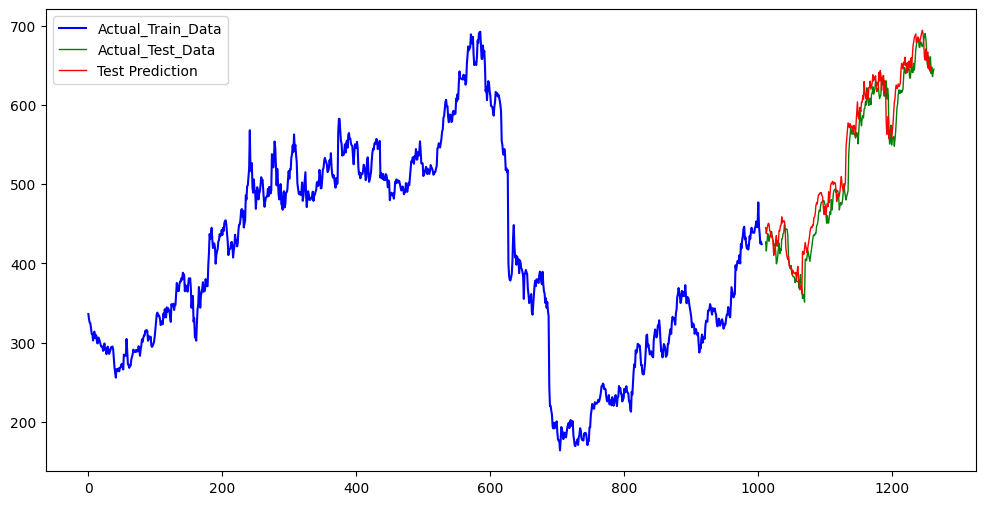

In [55]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
print("\n")
print("----------------------")
print("----------------------")
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print("----------------------")
print("----------------------")

# Append NaN values at the beginning of test_data for alignment
nan_array = np.full((len(train_predict) + (time_step * 2), 1), np.nan)
test_data_with_nans = np.concatenate((nan_array, test_data), axis=0)

# Plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2):len(scaled_data), :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(train_data), label='Actual_Train_Data', color='blue')
plt.plot(scaler.inverse_transform(test_data_with_nans), label='Actual_Test_Data', color='green', linewidth=1)
plt.plot(test_plot, label='Test Prediction', color='red',linewidth=1)
plt.legend()
plt.show()

# -------------------------------------------------------------------
# -------------------------------------------------------------------